In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
def load_and_preprocess_data():
    # We'll be using the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize the data to be between 0 and 1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Reshape data to include the channel dimension
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [4]:
def cnn():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten the output from convolutional layers
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(64, activation='relu'))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [11]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=5, batch_size=64):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test))
    return model, history

In [7]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print("Test accuracy:", test_acc)

In [12]:
def plot_training_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

    plt.tight_layout()
    plt.show()

In [15]:
def plot_filters(model):
    # Extract the weights of the first convolutional layer
    filters, biases = model.layers[0].get_weights()

    # Normalize filter values to [0, 1] for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    num_filters = filters.shape[3]
    plt.figure(figsize=(10, 10))
    for i in range(num_filters):
        plt.subplot(8, 8, i+1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')
    plt.show()

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.1759 - accuracy: 0.9463 - val_loss: 0.0533 - val_accuracy: 0.9825
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.0411 - val_accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0411 - val_accuracy: 0.9868
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0322 - val_accuracy: 0.9889
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0262 - val_accuracy: 0.9909
313/313 - 2s - loss: 0.0262 - accuracy: 0.9909 - 2s/epoch - 8ms/step
Test accuracy: 0.9908999800682068


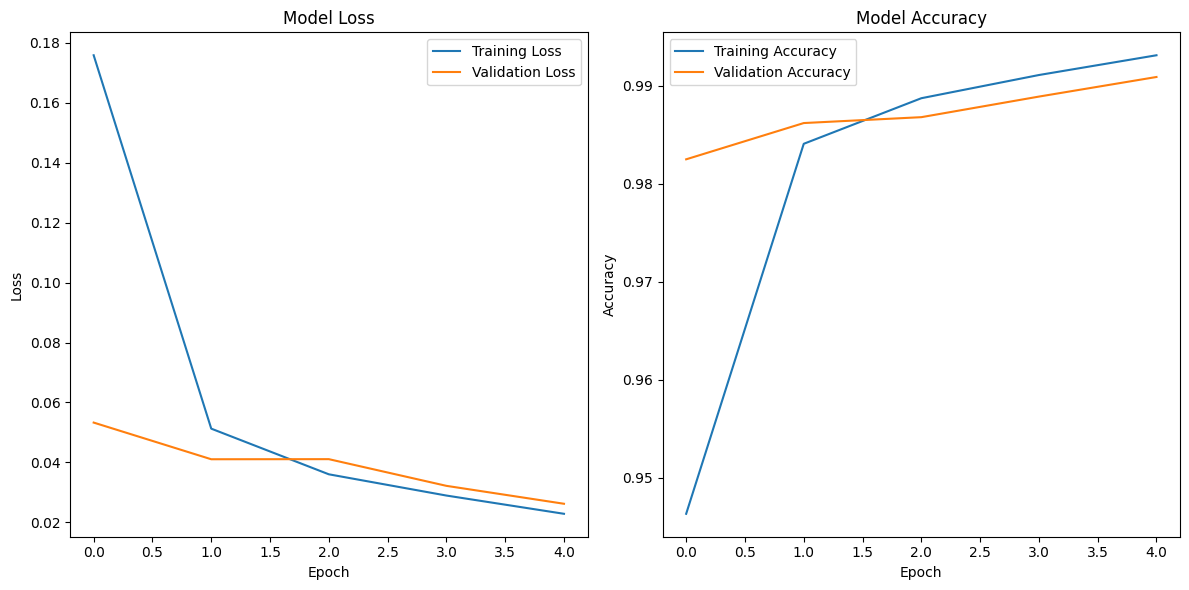

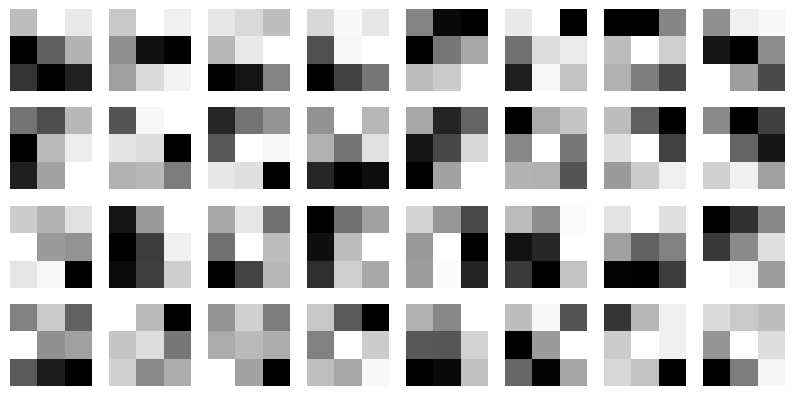

In [18]:
def main():
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # Create and compile CNN model
    model = cnn()

    # Train the model
    model, history = train_model(model, x_train, y_train, x_test, y_test)

    # Evaluate the model
    evaluate_model(model, x_test, y_test)

    # Plot training history
    plot_training_history(history)

    # Plot filters of the first convolutional layer
    plot_filters(model)

if __name__ == "__main__":
    main()